In [1]:
import os

from tensorflow.python.keras.backend import dtype

base_file_path = 'C:/Users/nikoLocal/Documents/Opencampus/Machine_Vision_challenge_data/'

print(os.path.isdir(base_file_path))

image_path = base_file_path + '/input_train/input_train'

print(os.path.isdir(image_path))

True
True


In [2]:
import pandas as pd

#load label data

label_df = pd.read_csv(os.path.join(base_file_path, 'Y_train_eVW9jym.csv'))

# show first few rows to see whether DF is loaded correctly
label_df.head(7)

,Unnamed: 0,filename,window,lib,Label
0,0,15b3bab7c186fd35b65df777890c427dd243feacbb85dd...,2003,Die01,Missing
1,1,1856617e1ac2d821a46a41b938818f0169342226a78f93...,2003,Die01,GOOD
2,2,19066cce773b3a092ebf4311b11858aa653da6f8274957...,2003,Die01,Missing
3,3,19c10caf4b24284e1748caed62d94cbb689d6b379b1cf5...,2003,Die01,GOOD
4,4,1a627426d55a668df8bcd381a7fa87b620481995b6755f...,2003,Die01,Missing
5,5,1a983b65277103a6e297ca45976d18e421be3d9d6fffad...,2003,Die01,GOOD
6,6,1abd8c6915e85d01ebafe6511c12f6d9a9b99a9d80b0a0...,2003,Die01,Missing


In [7]:
# create empty image data list

Img_List_Train = list()
Img_List_Valid = list()
Img_List_Test = list()

In [6]:
print(image_path)

ImageFileNameList = os.listdir(image_path)

ImageNum = len(ImageFileNameList)

LabelNum = label_df.shape[0]

print('Number of images: {}'.format(ImageNum))
print('Number of labels: {}'.format(LabelNum))

#check summary - also for missing values etc.
label_df.info()

C:/Users/nikoLocal/Documents/Opencampus/Machine_Vision_challenge_data//input_train/input_train
Number of images: 8278
Number of labels: 8278
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8278 non-null   int64 
 1   filename    8278 non-null   object
 2   window      8278 non-null   int64 
 3   lib         8278 non-null   object
 4   Label       8278 non-null   object
dtypes: int64(2), object(3)
memory usage: 323.5+ KB


In [9]:
# test with string matching

print(ImageFileNameList[0])

print(label_df['filename'].iloc[0])

b = label_df['filename'].iloc[0]
a = ImageFileNameList.index(b)

print('Index of file {} in the FileName list is: {}'.format(b,a))

#try matching all file names
failedImNum = 0
CorrectNum = 0

for i in range(ImageNum):
  try:
    ImageFileNameList.index(label_df['filename'].iloc[i])
    CorrectNum = CorrectNum+1
  except:
    failedImNum = failedImNum+1

#alll file names are present!
print('Numbers of mismatched file names: {}'.format(failedImNum))
print('Numbers of matched file names: {}'.format(CorrectNum))

#sort the list according to dataframe:
ImageFileNameList_Sorted = list()

for i in range(ImageNum):
  ImageFileNameList_Sorted.append(label_df['filename'].iloc[i])

print(ImageFileNameList_Sorted[5])
print(label_df['filename'].iloc[5])

00012893103b993a56e6bc460ea98a7e5cbd96b1b7277ce04094f440c01f63f0.png
15b3bab7c186fd35b65df777890c427dd243feacbb85dd5285764c906b59eabd.png
Index of file 15b3bab7c186fd35b65df777890c427dd243feacbb85dd5285764c906b59eabd.png in the FileName list is: 725
Numbers of mismatched file names: 0
Numbers of matched file names: 8278
1a983b65277103a6e297ca45976d18e421be3d9d6fffaddb81773fe7d58a1df5.png
1a983b65277103a6e297ca45976d18e421be3d9d6fffaddb81773fe7d58a1df5.png


In [55]:
#Check whether images are all valid

#easiest by loading them

from PIL import Image
import numpy as np

ImgList = list()

for i in range(ImageNum):
  temp_path = image_path  + '/' + label_df['filename'].iloc[i]

  if np.mod(i,100) == 0:
      print('{} images done'.format(i))

  try:
    Img = Image.open(temp_path)
    ImgNP = np.array(Img)
    ImgList.append(ImgNP)
  except:
    print('Failed to load image at index {}'.format(i))

0 images done
100 images done
200 images done
300 images done
400 images done
500 images done
600 images done
700 images done
800 images done
900 images done
1000 images done
Failed to load image at index 1096
1100 images done
1200 images done
1300 images done
Failed to load image at index 1365
1400 images done
Failed to load image at index 1429
1500 images done
Failed to load image at index 1538
1600 images done
1700 images done
1800 images done
1900 images done
2000 images done
2100 images done
2200 images done
2300 images done
2400 images done
2500 images done
2600 images done
2700 images done
Failed to load image at index 2709
2800 images done
2900 images done
3000 images done
3100 images done
3200 images done
3300 images done
3400 images done
3500 images done
3600 images done
3700 images done
3800 images done
3900 images done
4000 images done
4100 images done
4200 images done
4300 images done
4400 images done
4500 images done
4600 images done
4700 images done
4800 images done
4900

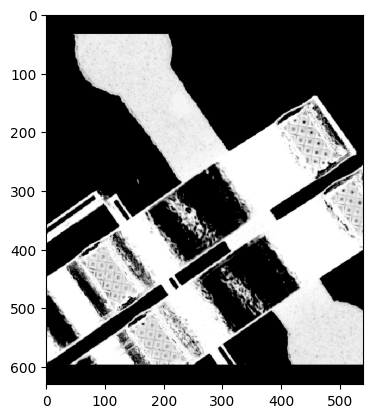

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(ImgList[3],cmap= 'Greys')

In [24]:
ImgList[3].max()

np.uint8(239)

<Axes: xlabel='Label'>

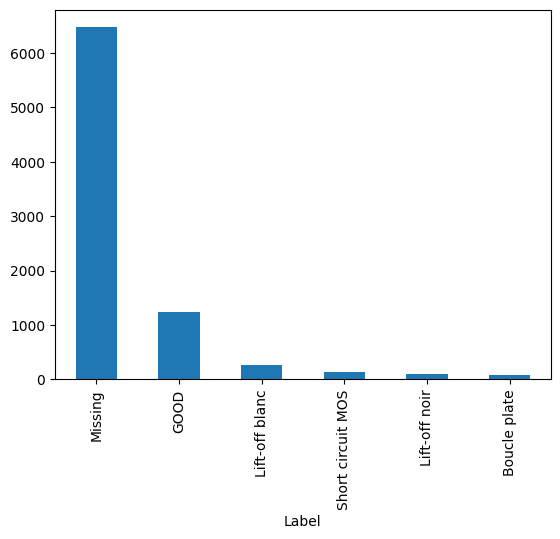

In [44]:
# data frame counts

label_df['Label'].value_counts().plot(kind='bar')


<Axes: xlabel='lib'>

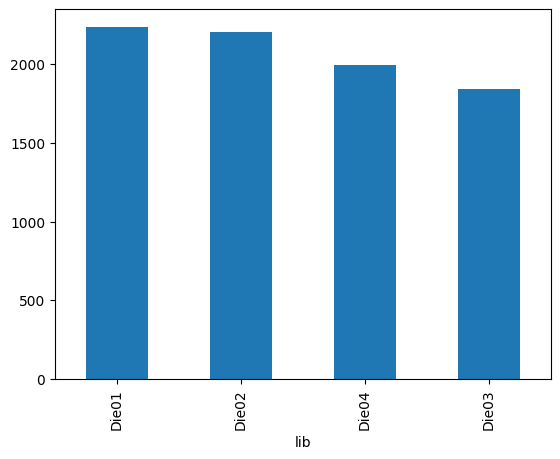

In [45]:
# labels:  Missing  , GOOD  , Lift-off blanc  , Short circuit MOS   ,  Lift-off noir   , Boucle plate

label_df['lib'].value_counts().plot(kind='bar')

<Axes: xlabel='window'>

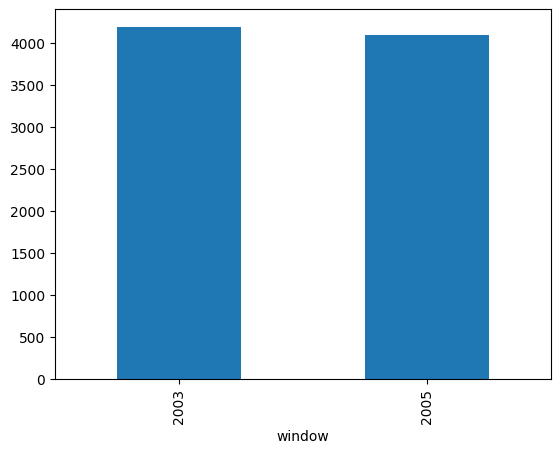

In [46]:
label_df['window'].value_counts().plot(kind='bar')

In [40]:
import shutil

In [41]:
from pathlib import Path

Now sort dataframe alphanumerically and compare with file name order from os.walk

In [8]:
label_df.sort_values('filename')

,Unnamed: 0,filename,window,lib,Label
1798,1798,00012893103b993a56e6bc460ea98a7e5cbd96b1b7277c...,2005,Die02,Missing
1799,1799,0003d3829d9f6601d6589ab3269a3506a6db1398f3da18...,2005,Die02,GOOD
5749,5749,000a14a35b75d3e62866a225d56fa66f2a504dada69186...,2005,Die01,GOOD
726,726,000c1ecc3a520c1948aea5b5d969ade21ffb6d0675ee0f...,2003,Die03,Missing
1017,1017,000d2a30b5b5def35888327c7332bcdfa1c70c87dbc644...,2003,Die04,Lift-off blanc
...,...,...,...,...,...
4284,4284,ffd06004a739d14bc5e3ca9d3728391aa343848d661fc2...,2005,Die03,Lift-off blanc
3488,3488,ffd18d56e8fa418fc8edb1ecbd2cedd2f8691ea6318793...,2003,Die03,Missing
4285,4285,ffde77ec61d3bd30ed52ffb0a4f38c2c182fc8b8ebc952...,2005,Die03,Lift-off noir
5033,5033,ffe9575526c409e459dbd4183c7b09706636d69f1ddfea...,2003,Die03,Missing


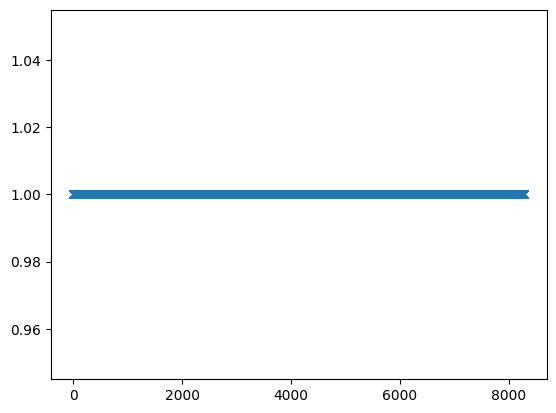

In [43]:
#use os.walk for filename order from folder
import matplotlib.pyplot as plt
#print(image_path)

import numpy as np

#dirpath, dirnames, filenames = os.walk(image_path, topdown=True)

#os.walk(image_path, topdown=True).next()

walk_filenames = list()

for (dirpath, dirnames, filenames) in os.walk(image_path):
    walk_filenames.append(filenames)

walk_filenames[0][1]

#check whether each element in the sorted df and the os walk list are identical

label_df_sortedFilenames = label_df.sort_values('filename')

CompareList = list()

for i in range(len(walk_filenames[0])):
    CompareList.append(walk_filenames[0][i] == label_df_sortedFilenames['filename'].iloc[i])

plt.figure()
plt.plot(CompareList,'x')

#sorted exactly the same - all values are 1

#CompareList[99]

#filenames[0]

In [48]:
a = '123'
b = '124'

a == b
#make some plotting - subsets



,Unnamed: 0,filename,window,lib,Label
1798,1798,00012893103b993a56e6bc460ea98a7e5cbd96b1b7277c...,2005,Die02,Missing
726,726,000c1ecc3a520c1948aea5b5d969ade21ffb6d0675ee0f...,2003,Die03,Missing
4738,4738,001abd35aa4e374ef55c3bc0c4087486dc25925823ca7f...,2003,Die03,Missing
6083,6083,00249823d43af46e0fdec636fea56d3b5c7176a17c0ff3...,2005,Die02,Missing
1435,1435,0029efd30b64c58ff97fc82e62ffa3bf8a9bc29e8cb5a0...,2005,Die01,Missing


[2345 4252  920 2551 5237 1982 2302 3297 6421]


Text(0.5, 0.98, 'Label = Missing')

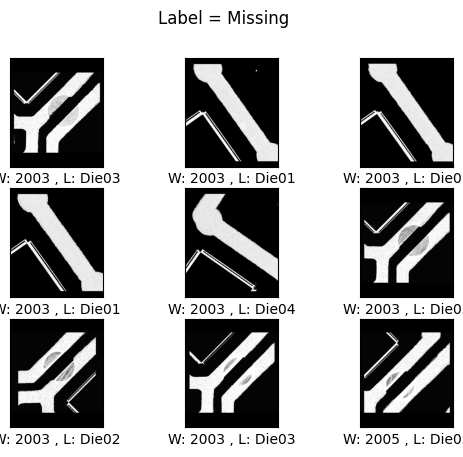

In [61]:
#create subset DFs and plot -- MISSING

df_Missing = label_df_sortedFilenames[label_df_sortedFilenames['Label'] == 'Missing']
df_Missing.head()

num_datapoints = df_Missing.shape[0]

num_images = 9
#random indices

randIndices = np.random.randint(0, high=num_datapoints, size=num_images)
print(randIndices)

plt.figure()
#load images
for i in range(num_images):
    temp_path = image_path + '/' + df_Missing['filename'].iloc[randIndices[i]]
    temp_image = Image.open(temp_path)
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(temp_image,cmap='Greys')
    plt.xlabel('W: {} , L: {}'.format(df_Missing['window'].iloc[randIndices[i]],df_Missing['lib'].iloc[randIndices[i]]))

plt.suptitle('Label = Missing')

In [97]:
def PlotLabels(df,label,grid):
    try:
        df_LabelSpec = df[df['Label'] == label]
    except:
        print('not existing label type')
        return

    num_datapoints = df_LabelSpec.shape[0]
    num_images = grid[0]*grid[1]
    #random indices
    randIndices = np.random.randint(0, high=num_datapoints, size=num_images)

    plt.figure()
    #load images
    for i in range(num_images):
        temp_path = image_path + '/' + df_LabelSpec['filename'].iloc[randIndices[i]]
        temp_image = Image.open(temp_path)
        plt.subplot(grid[0],grid[1],i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(temp_image,cmap='Greys')
        plt.xlabel('W: {} , L: {}'.format(df_LabelSpec['window'].iloc[randIndices[i]],df_LabelSpec['lib'].iloc[randIndices[i]]),fontsize=7)

    plt.suptitle('Label = {}'.format(label))

def PlotLib(df,label,grid):
    try:
        df_LabelSpec = df[df['lib'] == label]
    except:
        print('not existing label type')
        return

    num_datapoints = df_LabelSpec.shape[0]
    num_images = grid[0]*grid[1]
    #random indices
    randIndices = np.random.randint(0, high=num_datapoints, size=num_images)

    plt.figure()
    #load images
    for i in range(num_images):
        temp_path = image_path + '/' + df_LabelSpec['filename'].iloc[randIndices[i]]
        temp_image = Image.open(temp_path)
        plt.subplot(grid[0],grid[1],i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(temp_image,cmap='Greys')
        plt.xlabel('L: {} , W: {}'.format(df_LabelSpec['Label'].iloc[randIndices[i]],df_LabelSpec['window'].iloc[randIndices[i]]),fontsize=7)

    plt.suptitle('lib = {}'.format(label))

def PlotWindow(df,label,grid):
    try:
        df_LabelSpec = df[df['window'] == label]
    except:
        print('not existing label type')
        return

    num_datapoints = df_LabelSpec.shape[0]
    num_images = grid[0]*grid[1]
    #random indices
    randIndices = np.random.randint(0, high=num_datapoints, size=num_images)

    plt.figure()
    #load images
    for i in range(num_images):
        temp_path = image_path + '/' + df_LabelSpec['filename'].iloc[randIndices[i]]
        temp_image = Image.open(temp_path)
        plt.subplot(grid[0],grid[1],i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(temp_image,cmap='Greys')
        plt.xlabel('L: {} , L: {}'.format(df_LabelSpec['Label'].iloc[randIndices[i]],df_LabelSpec['lib'].iloc[randIndices[i]]),fontsize=7)

    plt.suptitle('window = {}'.format(label))

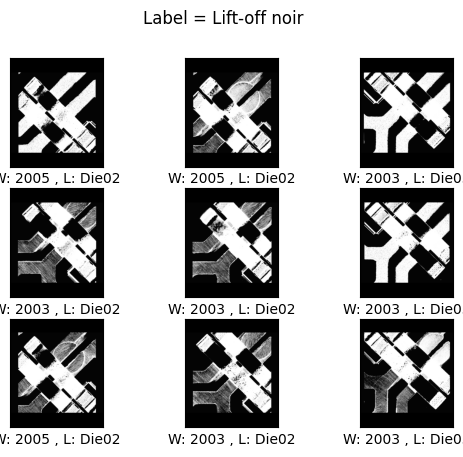

In [86]:
# labels:  Missing  , GOOD  , Lift-off blanc  , Short circuit MOS   ,  Lift-off noir   , Boucle plate
InspectLabel = 'Lift-off noir'
PlotLabels(label_df_sortedFilenames,InspectLabel,[3,3])

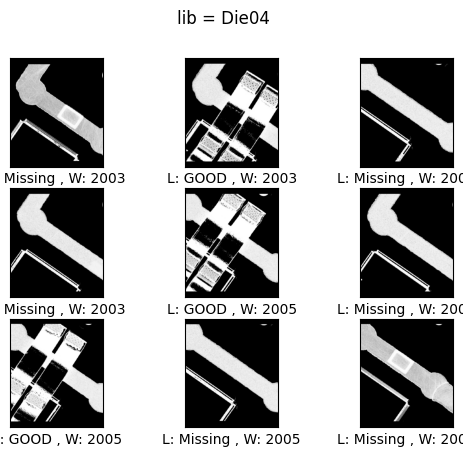

In [88]:
# libs = Die01 , Die02 , Die03 , Die04

PlotLib(label_df_sortedFilenames,'Die04',[3,3])

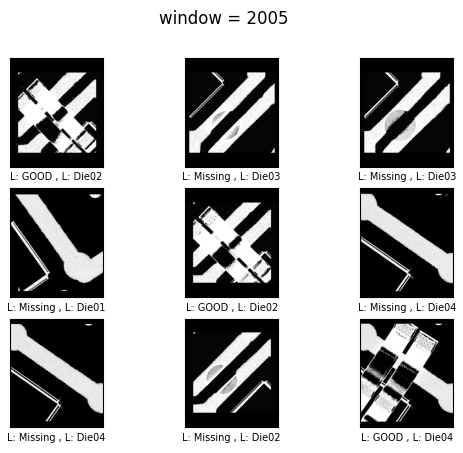

In [94]:
# window: 2003 , 2005  - have to be input as integers

PlotWindow(label_df_sortedFilenames,2005,[3,3])



In [ ]:
# To Do:
# visualize the resolutions of the image data:
# how to count? -> just plot all datapoints into one graph with x_res, y_res as axis